# Minilab 2  - Looking at Census Data

In the following lab we will take a look at some census data. A [census](https://en.wikipedia.org/wiki/Census) is the procedure of systematically acquiring and recording information about the members of a given population. The U.S. is required to take census data every 10 years. Information on the race, ethnicity, age, household size, family size etc. are recorded per [census tract](https://en.wikipedia.org/wiki/Census_tract).

In this lab we will look at the distribution of population age for a few Berkeley census tracts.

### First some imports
Click in the box below and press 'Shift'+'Enter' to run the code.

In [2]:
from datascience import *
import numpy as np

### Next, reading the data

Sites like http://census.ire.org/ provide a nice interface to allow you to download census data. But we have downloaded the relevant data and cleaned it for you. Read in the csv below to see what the data looks like.

In [3]:
data = Table.read_table('data/bay_area_census_age.csv')

data

STATE,COUNTY,NAME,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
6,1,Census Tract 4001,2937,1461,1476,150,122,91,88,85,129,126,163,210,206,281,310,342,238,147,110,75,64,6882245,0,37.8676,-122.232
6,1,Census Tract 4002,1974,971,1003,138,98,64,46,72,184,181,183,174,105,113,128,165,140,84,44,25,30,595106,0,37.8482,-122.25
6,1,Census Tract 4003,4865,2228,2637,320,219,143,174,211,495,526,518,475,339,356,314,282,198,90,78,53,74,1105328,0,37.8406,-122.254
6,1,Census Tract 4004,3703,1711,1992,255,168,94,85,234,486,446,398,332,223,213,210,206,132,78,55,42,46,703688,0,37.8482,-122.257
6,1,Census Tract 4005,3517,1677,1840,184,133,86,92,313,495,468,353,261,253,187,179,199,109,67,32,49,57,588111,0,37.8485,-122.265
6,1,Census Tract 4006,1571,723,848,64,60,59,66,156,199,200,145,107,107,113,96,55,51,20,25,21,27,297855,0,37.842,-122.265
6,1,Census Tract 4007,4206,1997,2209,203,184,152,160,359,448,407,371,328,315,288,249,233,163,88,79,83,96,880513,0,37.8418,-122.272
6,1,Census Tract 4008,3594,1745,1849,193,145,139,179,269,389,421,305,259,225,240,200,188,146,92,73,59,72,695230,0,37.8454,-122.283
6,1,Census Tract 4009,2302,1127,1175,134,116,105,122,191,221,214,188,198,171,173,130,120,64,52,35,30,38,425163,0,37.8395,-122.28
6,1,Census Tract 4010,5678,2671,3007,326,311,328,341,476,580,557,529,381,392,389,344,268,142,86,61,87,80,1154123,0,37.8312,-122.272


### About the data
In the table above, we have total population, male population, female population, and population by age group for all the census tracts in the bay area. 

In addition we have some **geographic properties** of each census tract including the land area, water area, and latitude and longitude coordinates for a point inside the census tract.

Below is a map with the Bay Area census tracts highlighted in blue.

<img src="figures/CA_census_tracts.jpg", width="500">

### Using a method

Don't be scared by the code below - we will get into the details later in the course. For now just recognize that the code below is a *method* used to compute the distance between two (latitude, longitude) coordinates. Press 'Shift' + 'Enter' to run the code in the box below, we will use this method shortly.

In [4]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to spherical coordinates in radians.
    degrees_to_radians = np.pi/180.0
        
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
        
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
        
    # Compute spherical distance from spherical coordinates.
        
    # For two locations in spherical coordinates 
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) = 
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    
    cos = (np.sin(phi1)*np.sin(phi2)*np.cos(theta1 - theta2) + 
           np.cos(phi1)*np.cos(phi2))
    arc = np.arccos( cos )

    # Multiply arc by the radius of the earth to get length.
    return 3960.*arc #to get distance in miles

### Find the census tract closest to the Channing-Bowditch apartments (just South of Campus)
Now we will use the distance_on_unit_sphere() method to find the census tract closest to the Channing-Bowditch apartments. From [Google Maps](https://goo.gl/maps/5xudrVbixun) we learn that the apartment is located at 37.867495, -122.257617 (lat, lon). We use the .apply() method to calculate the distance between each census tract and the Channing Bodwitch apartment.

In [5]:
#return closest to 37.867495, -122.257617 (Channing-Bowditch apartments): https://goo.gl/maps/5xudrVbixun
lat1, lon1 = 37.867495, -122.257617

# calculate the distance from the Channing-Bowditch apartments to each tract. Save this in the data table 
# in a column labeled 'distance to Channing'
data['distance to Channing'] = data.apply(lambda lat2, lon2 : distance_on_unit_sphere(lat1, lon1, lat2, lon2), 
                                          ['INTPTLAT10', 'INTPTLON10'])

#select the row where 'distance to Channing' is minimum. This is the closest census tract to the Channing Apartments
channing_tract = data.where(data['distance to Channing'] == min(data['distance to Channing']))

#let's take a look at what this looks like.
channing_tract

STATE,COUNTY,NAME,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,distance to Channing
6,1,Census Tract 4228,8368,4131,4237,15,11,8,4020,3112,380,196,121,95,83,95,100,62,38,10,11,4,7,408570,0,37.8668,-122.26,0.13784


### Let's create a horizontal bar graph of population vs. age group
We can use the barh function to create a bar graph. The function needs the data to be oriented in a single column. Right now the data is all oriented in one row. We will do a little trick and use the .stack() method to rotate the table. We will save this table as a variable called tograph

In [14]:
tograph = channing_tract.select(['Under 5 years', '5 to 9 years', '10 to 14 years','15 to 19 years',
                                 '20 to 24 years','25 to 29 years','30 to 34 years','35 to 39 years',
                                 '40 to 44 years','45 to 49 years','50 to 54 years','55 to 59 years',
                                 '60 to 64 years','65 to 69 years','70 to 74 years','75 to 79 years',
                                 '80 to 84 years','85 years and over','STATE']).stack('STATE')
tograph

STATE,column,value
6,Under 5 years,15
6,5 to 9 years,11
6,10 to 14 years,8
6,15 to 19 years,4020
6,20 to 24 years,3112
6,25 to 29 years,380
6,30 to 34 years,196
6,35 to 39 years,121
6,40 to 44 years,95
6,45 to 49 years,83


### Run the code below to create the bar graph.

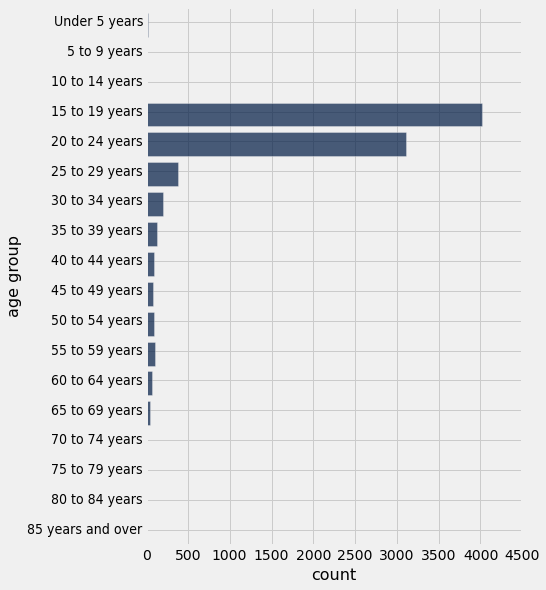

In [15]:
tograph.relabel('column', 'count')
tograph.relabel('value', 'age group')
tograph.select(['count','age group']).barh('count')

**Question 1: ** What can we say about the data plotted above? Which age groups have the highest population. Do you think this is representative of the population for the rest of the Bay Area?

In [7]:
# Answer here:



### Let's look at another South Berkeley Location
Let's see what the population looks like farther south in Berkeley, near the Oakland-Berkeley border. There's a Whole Foods at the [corner of Ashby and Telegraph](https://goo.gl/maps/xNXp4XgtbN12). Let's repeat the procedure above to find the closest census tract to the Whole Foods and create a bar graph of the population at this location.

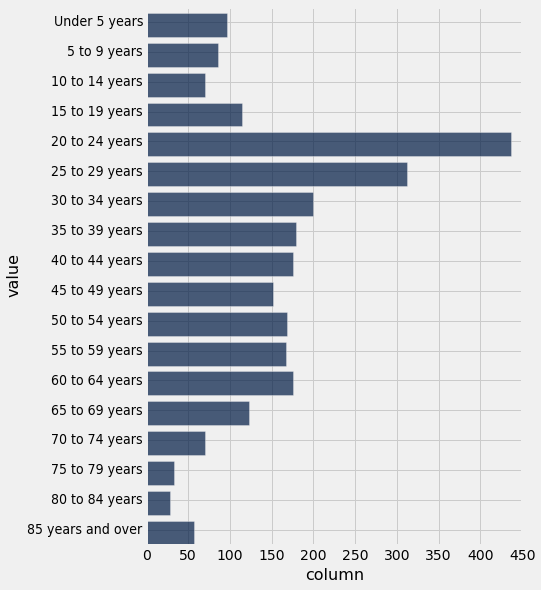

In [8]:
#Whole Foods at Ashby and Telegraph, 37.858636,-122.2620359 https://goo.gl/maps/xNXp4XgtbN12
lat1, lon1 = 37.858636,-122.2620359

# calculate the distance from the Whole Foods to each census tract. Save this in the data table 
# in a column labeled 'distance to Whole Foods'
data['distance to Whole Foods'] = data.apply(lambda lat2, lon2 : distance_on_unit_sphere(lat1, lon1, lat2, lon2), ['INTPTLAT10', 'INTPTLON10'])

#select the row where 'distance to Channing' is minimum. This is the closest census tract to the Channing Apartments
wholefood_tract = data.where(data['distance to Whole Foods'] == min(data['distance to Whole Foods']))

# create a bar graph of the population by age.
tograph = wholefood_tract.select(['Under 5 years', '5 to 9 years', '10 to 14 years','15 to 19 years',
                                  '20 to 24 years','25 to 29 years','30 to 34 years','35 to 39 years',
                                  '40 to 44 years','45 to 49 years','50 to 54 years','55 to 59 years',
                                  '60 to 64 years','65 to 69 years','70 to 74 years','75 to 79 years',
                                  '80 to 84 years','85 years and over','STATE']).stack('STATE')

tograph.select(['column','value']).barh('column')

** Question 2: ** Comment on how the population data for this census tract looks different from the population data from the Channing-Bowditch apartments census tract. What might explain the differences in the age demographics in the two census tracts. 

In [9]:
#Answer here


### What about the Berkeley Hills?
Let's look at one more Berkeley census tract. [Remilard Park](https://goo.gl/maps/3kCQkTDHjb32) is located in the Berkeley Hills, Northeast of campus. 

**Question 3: ** How do you expect the population data in this census tract to compare to the others?

In [10]:
# Answer here


 Run the code below to find out.

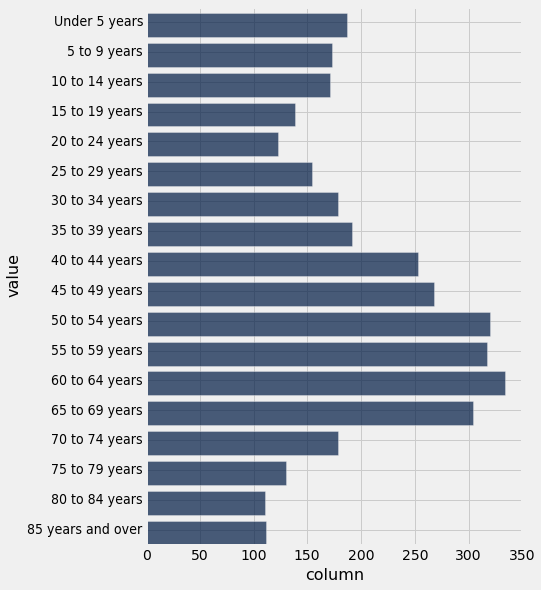

In [11]:
#Remilard Park Berkeley Hills 37.8892735,-122.2616268 https://goo.gl/maps/3kCQkTDHjb32
lat1, lon1 = 37.8892735,-122.2616268

data['distance to Berkeley Hills'] = data.apply(lambda lat2, lon2 : distance_on_unit_sphere(lat1, lon1, lat2, lon2), ['INTPTLAT10', 'INTPTLON10'])

berkeleyhills_tract = data.where(data['distance to Berkeley Hills'] == min(data['distance to Berkeley Hills']))

tograph = berkeleyhills_tract.select(['Under 5 years', '5 to 9 years', '10 to 14 years','15 to 19 years',
                                      '20 to 24 years','25 to 29 years','30 to 34 years','35 to 39 years',
                                      '40 to 44 years','45 to 49 years','50 to 54 years','55 to 59 years',
                                      '60 to 64 years','65 to 69 years','70 to 74 years','75 to 79 years',
                                      '80 to 84 years','85 years and over','STATE']).stack('STATE')

tograph.select(['column','value']).barh('column')

** Question 4: ** How does the age distribution in this census tract compare to the age-distribution in the previous two census tracts? Does this conform to your expectations?

In [ ]:
# Answer here


### If time allows
Pick another Bay Area location, look up the lat, lon coordinates and see if you can replicate the procedure above to find the closest census tract and plot the population vs. age for this census tract. Comment on your findings.

In [ ]:
# Your code here


In [ ]:
import folium
import json

# geojson_data = json.load(open('data/bay_area_census_tracts.geojson'))
# geojson_str = json.dumps(geojson_data) 

census_map = folium.Map(width=650, height=500, zoom_start=10,
                     location=[37.8062449,-122.371983])

# Add the taz geojson data layer to the map using the geo_json() method
census_map.geo_json(geo_str=geojson_str)

# census_map.simple_marker(location=[37.8718992,-122.25])
# Create the map - notice that a file called map.html has been added to your demos folder 
census_map.create_map('census_map.html')

#to show the map in-line
census_map

In [21]:
import folium
import json

census_map = folium.Map(width=650, height=500, zoom_start=10,
                     location=[37.8062449,-122.371983])

census_map.simple_marker(location=[37.8718992,-122.25], popup='Optional Pop-up Text')
# Create the map - notice that a file called map.html has been added to your demos folder 
census_map.create_map('census_map.html')

#to show the map in-line
census_map
